In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import itertools
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.decomposition import SparsePCA,PCA
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
df = pd.read_csv('./NuclearCytosolLncRNAs_ALL_4mer_stride1_tokens.csv.count.csv',index_col=0)

In [4]:
df.head()

,class,aaaa,tttt,agaa,cctg,ccag,ctgg,aaat,gaaa,cagg,...,acga,ttcg,tcgt,cgac,gtcg,tcga,atcg,cgat,tacg,cgta
name,,,,,,,,,,,,,,,,,,,,,
ENST00000589451.1,Nuclear,0,0,3,8,10,12,1,2,7,...,0,0,0,0,0,0,0,0,0,0
ENST00000490351.1,Nuclear,8,5,9,1,4,2,4,5,2,...,2,0,0,1,0,1,0,0,0,0
ENST00000527727.1,Nuclear,8,4,4,3,4,6,4,6,3,...,0,0,0,0,0,0,0,0,0,0
ENST00000612724.1,Nuclear,6,4,4,2,4,4,2,2,1,...,0,0,0,0,2,0,0,0,0,0
ENST00000634547.1,Nuclear,5,6,3,12,12,14,5,7,10,...,1,1,1,0,2,0,0,2,1,1


In [5]:
df.shape

(8662, 257)

In [6]:
# convert the classes to 0 and 1
df['class'] = pd.factorize(df['class'])[0]

In [7]:
# Sample to train , test and validation data
X=df.drop(columns=['class'])
y=df.loc[:,'class']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15)
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=0.15, random_state=15)

In [8]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.decomposition import SparsePCA,PCA
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_selection import VarianceThreshold

In [9]:
# First I  will remove high correlated features
pipeline = Pipeline([('corr-removal',VarianceThreshold(0.8)),
                     #('selector',SelectKBest(chi2,100)),
                     ('scaler',MinMaxScaler())])

In [10]:
# Applying a pipeline
x_train = pipeline.fit_transform(X_train,y_train)
x_test = pipeline.transform(X_test)
x_valid = pipeline.transform(X_valid)

C:\Users\amorrow\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Classes look even

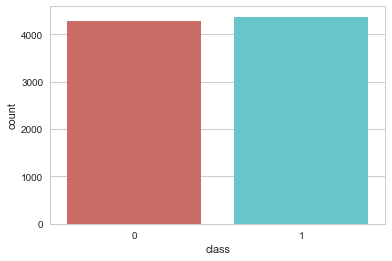

<Figure size 432x288 with 0 Axes>

In [18]:
sns.countplot(x=y,data=df,palette='hls')
plt.show()
plt.savefig('count_plot')

In [11]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
accuracy_score(pred,y_test)

0.6612810155799193

Logistic Regression Assumptions
Binary logistic regression requires the dependent variable to be binary.
For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
Only the meaningful variables should be included.
The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
The independent variables are linearly related to the log odds.
Logistic regression requires quite large sample sizes.

Assumptions made by Logistic Regression

The dependent variable must be categorical
The independent variables(features) must be independent (to avoid multicollinearity).

In [13]:
clf = LogisticRegression()
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
accuracy_score(pred,y_test)

0.6739757645701097